In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')
df.shape

(162049, 16)

In [3]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [4]:
df.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,162049.0,162049.000000,162049.000000,161192.000000,161192.000000,161061.000000,160748.000000,162049.000000,160748.000000,162049.000000,161192.000000,161192.000000
mean,2014.0,6.605027,15.749890,1278.283755,6.133859,1482.501282,2.240868,1357.356725,152.588511,1204.514634,12.479515,30.332244
std,0.0,3.324399,8.789417,522.583793,29.112035,523.958781,31.191037,1495.271031,72.547469,653.150062,5.232476,18.061569
min,2014.0,1.000000,1.000000,1.000000,-37.000000,1.000000,-67.000000,2.000000,18.000000,93.000000,0.000000,0.000000
25%,2014.0,4.000000,8.000000,831.000000,-5.000000,1127.000000,-12.000000,408.000000,103.000000,689.000000,8.000000,14.000000
50%,2014.0,7.000000,16.000000,1217.000000,-2.000000,1517.000000,-4.000000,694.000000,129.000000,991.000000,12.000000,30.000000
75%,2014.0,9.000000,23.000000,1721.000000,5.000000,1918.000000,7.000000,1726.000000,199.000000,1660.000000,17.000000,47.000000
max,2014.0,12.000000,31.000000,2400.000000,1553.000000,2400.000000,1539.000000,6527.000000,422.000000,2724.000000,24.000000,59.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
year         162049 non-null int64
month        162049 non-null int64
day          162049 non-null int64
dep_time     161192 non-null float64
dep_delay    161192 non-null float64
arr_time     161061 non-null float64
arr_delay    160748 non-null float64
carrier      162049 non-null object
tailnum      161801 non-null object
flight       162049 non-null int64
origin       162049 non-null object
dest         162049 non-null object
air_time     160748 non-null float64
distance     162049 non-null int64
hour         161192 non-null float64
minute       161192 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB


In [7]:
df_copy = df.select_dtypes(include=['object']).copy()
df_copy.info()
print(df_copy.shape)
print(df_copy.isnull().values.sum())
print(df_copy.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 4 columns):
carrier    162049 non-null object
tailnum    161801 non-null object
origin     162049 non-null object
dest       162049 non-null object
dtypes: object(4)
memory usage: 4.9+ MB
(162049, 4)
248
carrier      0
tailnum    248
origin       0
dest         0
dtype: int64


In [8]:
df_copy = df_copy.fillna(df_copy['tailnum'].value_counts().index[0])
df_copy['carrier'] = df_copy['carrier'].astype('category')

In [9]:
print(df_copy.isnull().sum())

carrier    0
tailnum    0
origin     0
dest       0
dtype: int64


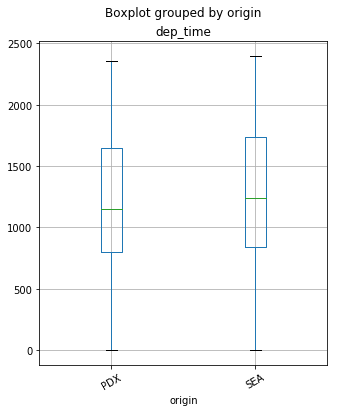

In [6]:
df.boxplot('dep_time','origin',rot=30,figsize=(5,6))

Below is bar plot to show distribution of carrier column (distribution of different categorical values within column)

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64


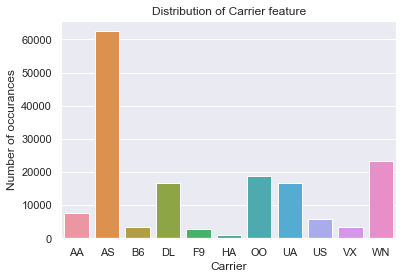

In [11]:
carrier_count = df_copy['carrier'].value_counts()
print(carrier_count)

sns.set(style='darkgrid')
sns.barplot(carrier_count.index, carrier_count.values)
plt.title('Distribution of Carrier feature')
plt.ylabel('Number of occurances',fontsize=12)
plt.xlabel('Carrier',fontsize=12)
plt.show()

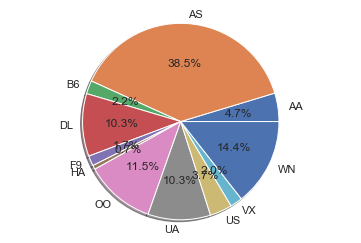

In [12]:
labels = df_copy['carrier'].astype('category').cat.categories.tolist()
counts = df_copy['carrier'].value_counts()
sizes= [counts[var_cat] for var_cat in labels] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

Encoding categorical feature

For practice encoding just carrier feature.
Below are the techniques used to encode.
1. Replacing values
2. Encoding labels
3. One-Hot encoding
4. Binary encoding
5. Backward difference encoding
6. Miscellaneous features

=======================================================

Replacing values

Just give a numerical value to each category in feature

In [13]:


#1.Way
#Manually assign a number to each category, can be used if categories are less
replace_map = {'carrier':{'AS':1,'WN':2,'OO':3,'DL':4,'UA':5,'AA':6,'US':7,'B6':8,'VX':9,'F9':10,'HA':11}}
print(replace_map)

#2.Way
#If categories are more, better to use dictionary comprehensions as below
lables = df_copy['carrier'].astype('category').cat.categories.tolist()
replace_map_comp = {'carrier':{k: v for k,v in zip(labels,list(range(1,len(lables)+1)))}}
print(replace_map_comp)

df_copy_replace = df_copy.copy()
df_copy_replace.replace(replace_map,inplace=True)
df_copy_replace.head()

{'carrier': {'AS': 1, 'WN': 2, 'OO': 3, 'DL': 4, 'UA': 5, 'AA': 6, 'US': 7, 'B6': 8, 'VX': 9, 'F9': 10, 'HA': 11}}
{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,7,N195UW,SEA,CLT
2,5,N37422,PDX,IAH
3,7,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


==========================================================

Label Encoding

It is similar to replacing values technique but here user can not choose numbers.
A numeric ( 0 to n_levels-1) value will be assigned to each level or category within feture.
ex. Sex colum has 2 levels male,female - 2 cateories are assigned with values 1,2(ex).



In [14]:

#1.Way
df_copy_label_enc = df_copy.copy()
df_copy_label_enc['carrier'] = df_copy_label_enc['carrier'].cat.codes
df_copy_label_enc.head()

#2.Way
#We can do one vs rest technique. assign some value to 1 level and 0 to reset of levels
df_copy_1vsRest = df_copy.copy()
df_copy_1vsRest['US_Code'] = np.where(df_copy_1vsRest['carrier'].str.contains('US'),1,0)
df_copy_1vsRest.head()

#3.Way 
#Label encoding with sckit lib
df_copy_sckit = df_copy.copy()
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_copy_sckit['carrier_code'] = lb_make.fit_transform(df_copy_sckit['carrier'])
df_copy_sckit.head()

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


==============================================================

One-Hot Encoding

In [15]:


#1.Way
df_copy_one_hot = df_copy.copy()
df_copy_one_hot = pd.get_dummies(df_copy_one_hot, columns = ['carrier'], prefix=['carrier'])
df_copy_one_hot.head()

#2.Way
df_copy_one_hot_sckit = df_copy.copy()
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_results = lb.fit_transform(df_copy_one_hot_sckit['carrier'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df.head()

df_copy_one_hot_sckit = pd.concat([df_copy_one_hot_sckit,lb_results_df],axis=1)
df_copy_one_hot_sckit.head()

,carrier,tailnum,origin,dest,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,AS,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,US,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,UA,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,US,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,AS,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


==================================================================

Binary Encoding

Categories are converted to ordinal values, and then converted to binary. 
Each digit in binary is split to new column.

In [17]:

df_copy_binary = df_copy.copy()

import category_encoders as ce
encoders = ce.BinaryEncoder(cols=['carrier'])
df_binary = encoders.fit_transform(df_copy_binary)
df_binary.head()

,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,tailnum,origin,dest
0,0,0,0,1,0,N508AS,PDX,ANC
1,0,1,0,0,1,N195UW,SEA,CLT
2,0,1,0,0,0,N37422,PDX,IAH
3,0,1,0,0,1,N547UW,PDX,CLT
4,0,0,0,1,0,N762AS,SEA,ANC


=======================================================================

Backward difference encoding

This technique falls under the contrast coding system for categorical features. 
A feature of K categories, or levels, usually enters a regression as a sequence of K-1 dummy variables. 
In backward difference coding, the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level.

In [18]:

df_copy_backward = df_copy.copy()
import category_encoders as ce
backward_enc = ce.BackwardDifferenceEncoder(cols=['carrier'])
df_backward = backward_enc.fit_transform(df_copy_backward)
df_backward.head()


,intercept,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,carrier_5,carrier_6,carrier_7,carrier_8,carrier_9,tailnum,origin,dest
0,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N508AS,PDX,ANC
1,1,0.090909,0.181818,0.272727,0.363636,0.454545,0.545455,0.636364,0.727273,-0.181818,-0.090909,N195UW,SEA,CLT
2,1,0.090909,0.181818,0.272727,0.363636,0.454545,0.545455,0.636364,-0.272727,-0.181818,-0.090909,N37422,PDX,IAH
3,1,0.090909,0.181818,0.272727,0.363636,0.454545,0.545455,0.636364,0.727273,-0.181818,-0.090909,N547UW,PDX,CLT
4,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N762AS,SEA,ANC


==========================================================================

Miscellaneous Features

Sometimes you may encounter categorical feature columns which specify the ranges of values for observation points, for example, the age column might be described in the form of categories like 0-20, 20-40 and so on.

While there can be a lot of ways to deal with such features, the most common ones are either split these ranges into two separate columns or replace them with some measure like the mean of that range.

You will first create a dummy DataFrame which has just one feature age with ranges specified using the pandas DataFrame function. Then you will split the column on the delimeter - into two columns start and end using split() with a lambda() function

In [19]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})

dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df_age['age'].map(lambda x: x.split('-')))
dummy_df_age.head()

,age,start,end
0,0-20,0,20
1,20-40,20,40
2,40-60,40,60
3,60-80,60,80


To replace the range with its mean, you will write a split_mean() function which basically takes one range at a time, splits it, then calculates the mean and returns it. To apply a certain function to all the entities of a column you will use the .apply() method


In [20]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})

def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))
dummy_df_age.head()

,age,age_mean
0,0-20,10.0
1,20-40,30.0
2,40-60,50.0
3,60-80,70.0
